<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-файлов" data-toc-modified-id="Загрузка-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка файлов</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация" data-toc-modified-id="Общая-информация-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общая информация</a></span></li><li><span><a href="#Ресэмлирвоание-данных" data-toc-modified-id="Ресэмлирвоание-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ресэмлирвоание данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общий-анализ" data-toc-modified-id="Общий-анализ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общий анализ</a></span></li><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Сезонность" data-toc-modified-id="Сезонность-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сезонность</a></span></li><li><span><a href="#Скользящее-стандартное-отклонение" data-toc-modified-id="Скользящее-стандартное-отклонение-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Скользящее стандартное отклонение</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-градиентного-бустинга" data-toc-modified-id="Модель-градиентного-бустинга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Модель градиентного бустинга</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

**Опсиание проекта**
Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

**План работы**
1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.

**Описание данных**
Все данные представлены в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Загрузка файлов

In [1]:
!pip install lightgbm -q

In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler)
from sklearn.model_selection import (
    train_test_split,
    TimeSeriesSplit,
    cross_val_score,
    RandomizedSearchCV)
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

from lightgbm import LGBMRegressor

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
RANDOM_STATE = 42

In [3]:
try:
    taxi = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
except:
    taxi = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', parse_dates=[0], index_col=[0])

## Обзор данных

### Общая информация

In [4]:
def get_start_info(data):
    display(data.head())
    data.info()
    display(data.describe().T)

In [5]:
get_start_info(taxi)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


,count,mean,std,min,25%,50%,75%,max
num_orders,26496.0,14.070463,9.21133,0.0,8.0,13.0,19.0,119.0


### Ресэмлирвоание данных

In [6]:
taxi = taxi.resample('1H').sum()

get_start_info(taxi)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


,count,mean,std,min,25%,50%,75%,max
num_orders,4416.0,84.422781,45.023853,0.0,54.0,78.0,107.0,462.0


In [7]:
taxi.tail()

,num_orders
datetime,
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159
2018-08-31 22:00:00,223
2018-08-31 23:00:00,205


### Вывод

В ходе предварительного обзора можно сделать следующие выводы:
- В исходном датасете 26496 строк и один столбец;
- В датасете после ресэмлирвоания по часу осталось 4416 строк и один столбец;
- Данные о количестве заказов собраны с 1 марта 2018 года по 31 августа 2018 года;
- Данные пригодны для дальнейшего исследования.

## Анализ данных

### Общий анализ

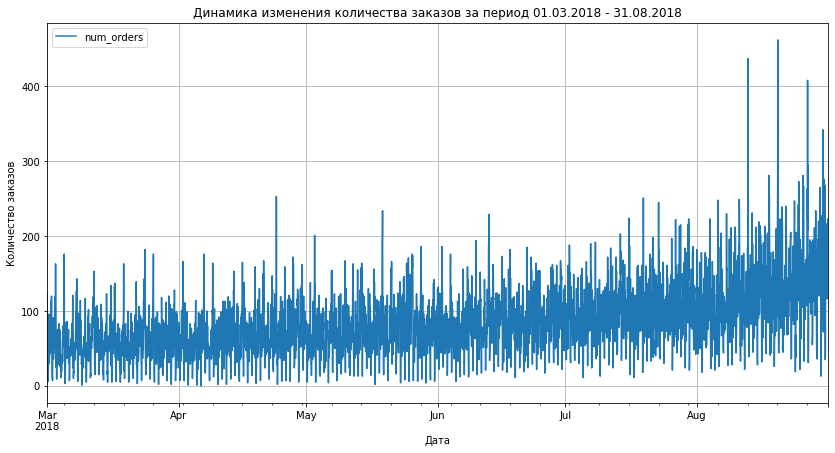

In [8]:
taxi.plot(
    grid=True, 
    figsize=(14,7),
    title = 'Динамика изменения количества заказов за период 01.03.2018 - 31.08.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

Поскольку среднее число заказов и стандартное отклонение увеличиваются, временной ряд не статичен. Замтен тренд на увеличение числа заказов. Рассмотрим динамику за месяц и день, возможно заметим некоторые закономерности.

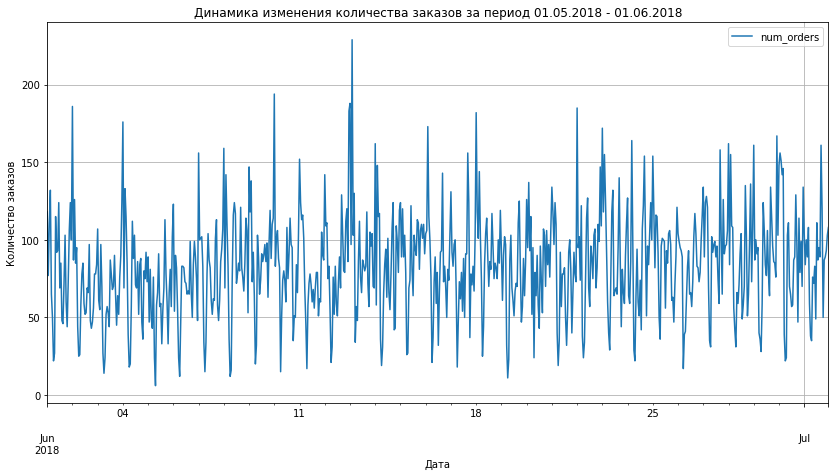

In [9]:
taxi['2018-06-01':'2018-07-01'].plot(
    grid=True, 
    figsize=(14,7),
    title = 'Динамика изменения количества заказов за период 01.05.2018 - 01.06.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

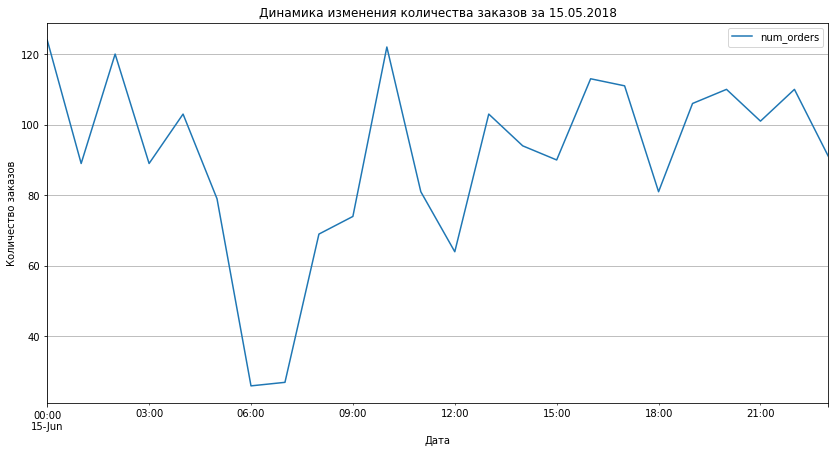

In [10]:
taxi['2018-06-15'].plot(
    grid=True, 
    figsize=(14,7),
    title = 'Динамика изменения количества заказов за 15.05.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

**Вывод**

Исходя из общего анализа данных можно сделать следующие выводы:
- Количество заказов колеблется от 0 до 462 в час;
- Наблюдаются повторяющиеся события изменения динамики количества заказов как на уровне месяца, так и на уровне дня.

### Скользящее среднее

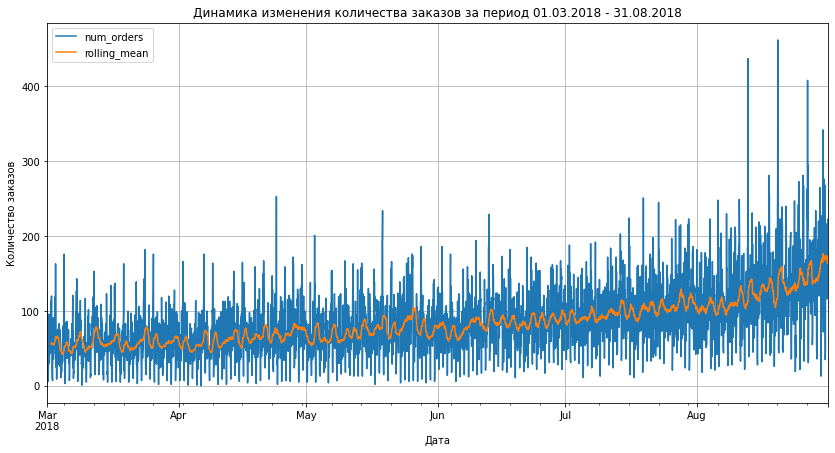

In [11]:
taxi_analyze = taxi.copy()
taxi_analyze['rolling_mean'] = taxi_analyze.shift().rolling(24).mean()
taxi_analyze.plot(
    grid=True, 
    figsize=(14,7),
    title = 'Динамика изменения количества заказов за период 01.03.2018 - 31.08.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

**Вывод**

Наблюдается тренд на увеличение количества заказов. Причем на протяжении всего периода наблюдается увеличение среднего, а в августе увеличение с ускорением.

### Сезонность

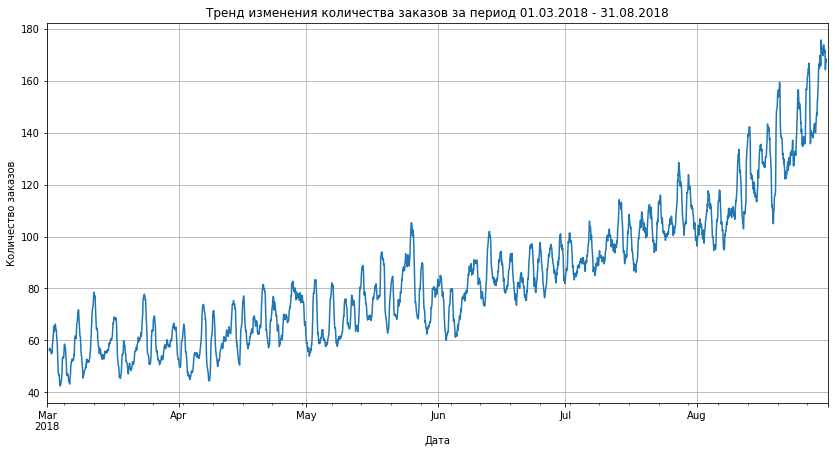

In [24]:
decomposed = seasonal_decompose(taxi)
decomposed.trend.plot(
    grid=True,
    figsize=(14,7),
    title = 'Тренд изменения количества заказов за период 01.03.2018 - 31.08.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

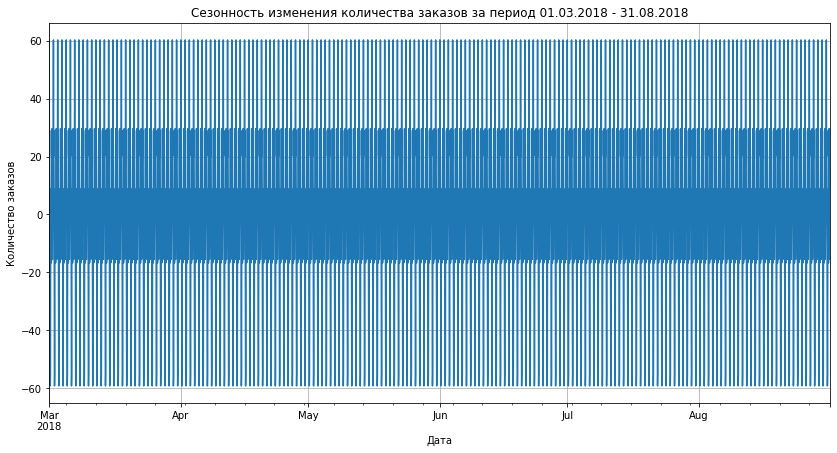

In [13]:
decomposed.seasonal.plot(
    grid=True, 
    figsize=(14,7),
    title = 'Сезонность изменения количества заказов за период 01.03.2018 - 31.08.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

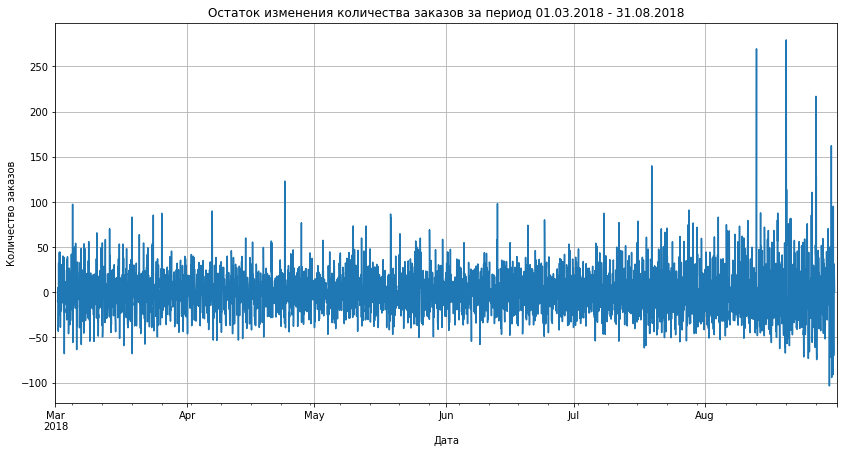

In [14]:
decomposed.resid.plot(
    grid=True, 
    figsize=(14,7),
    title = 'Остаток изменения количества заказов за период 01.03.2018 - 31.08.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

Довольно трудно что-либо различить в сезонности за полгода, рассмотрим сезонность за месяц.

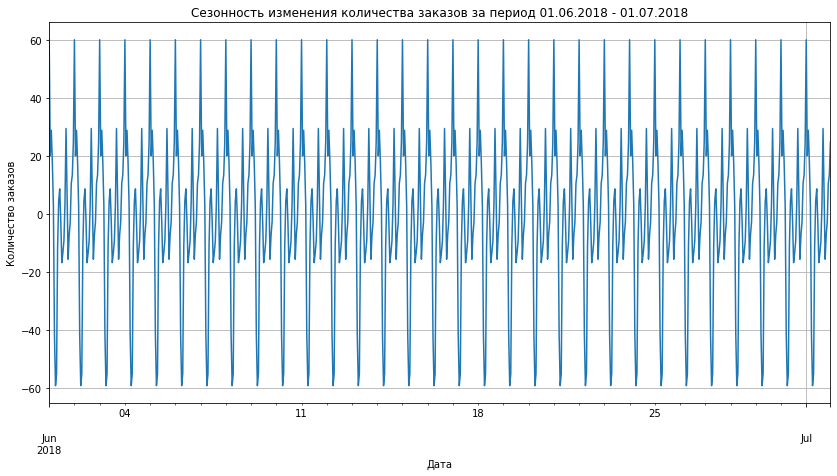

In [15]:
decomposed.seasonal['2018-06-01':'2018-07-01'].plot(
    grid=True, 
    figsize=(14,7),
    title = 'Сезонность изменения количества заказов за период 01.06.2018 - 01.07.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

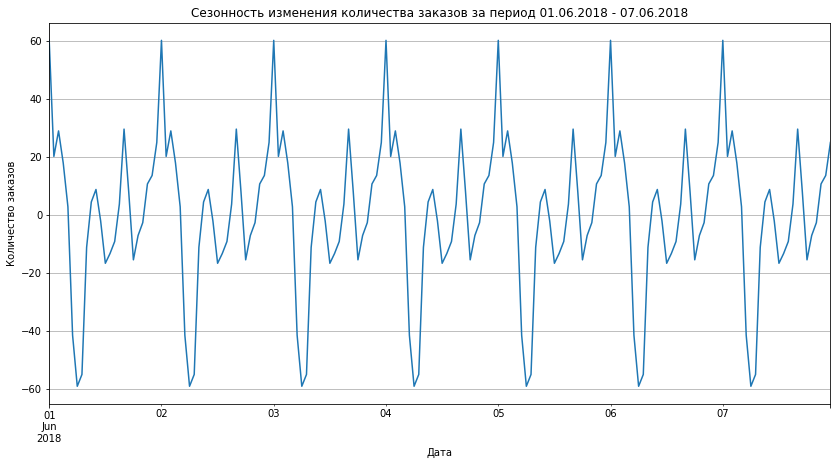

In [16]:
decomposed.seasonal['2018-06-01':'2018-06-07'].plot(
    grid=True, 
    figsize=(14,7),
    title = 'Сезонность изменения количества заказов за период 01.06.2018 - 07.06.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

Заметна дневная сезонность, рассмотрим день.

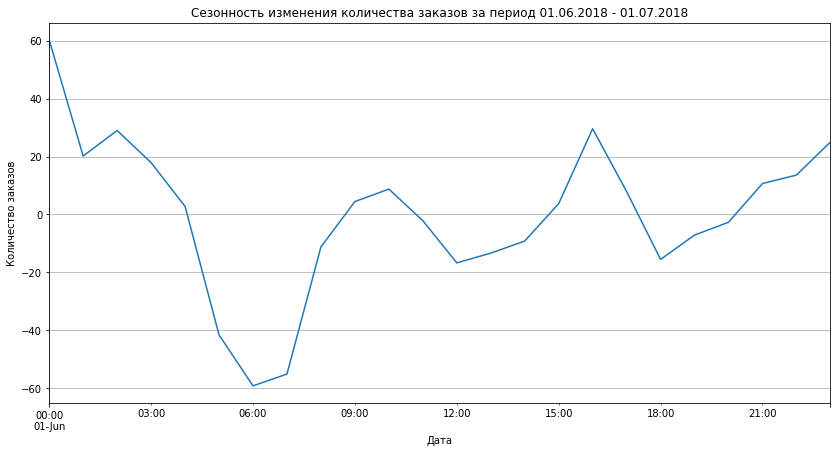

In [17]:
decomposed.seasonal['2018-06-01'].plot(
    grid=True, 
    figsize=(14,7),
    title = 'Сезонность изменения количества заказов за период 01.06.2018 - 01.07.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

Проверим сезонность по неделям, проведя для этого дополнительное ресэмплирование.

In [18]:
taxi_week = taxi.resample('1W').sum()
get_start_info(taxi_week)

,num_orders
datetime,
2018-03-04,5301
2018-03-11,9411
2018-03-18,9785
2018-03-25,9767
2018-04-01,9752


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27 entries, 2018-03-04 to 2018-09-02
Freq: W-SUN
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0 bytes


,count,mean,std,min,25%,50%,75%,max
num_orders,27.0,13807.814815,4180.824413,5301.0,10650.0,13140.0,16679.0,23297.0


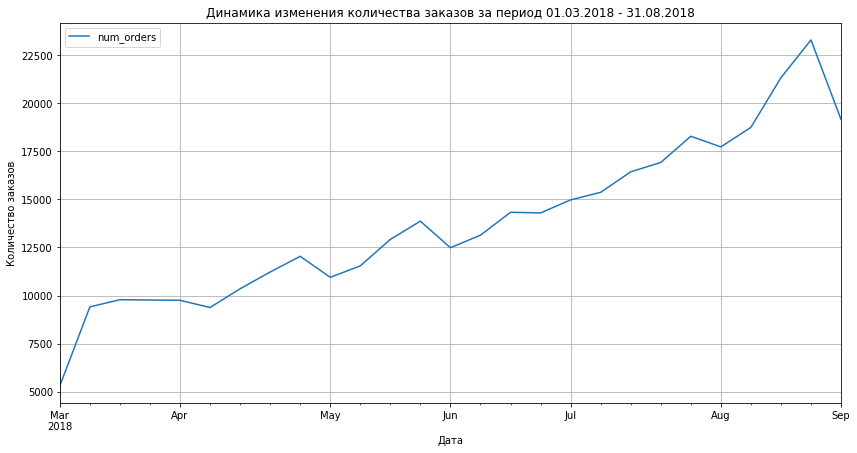

In [20]:
taxi_week.plot(
    grid=True, 
    figsize=(14,7),
    title = 'Динамика изменения количества заказов за период 01.03.2018 - 31.08.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

**Вывод**

Таким образом, можно заметить, дневную сезонность. Она заключается в следующем:
- Минимум заказов приходится на 06:00;
- Максимум заказов приходится на 00:00;
- Также присутсвтует еще несколько меньших пиков: 09:00-10:00, 16:00-17:00, 22:00-23:00.

### Скользящее стандартное отклонение

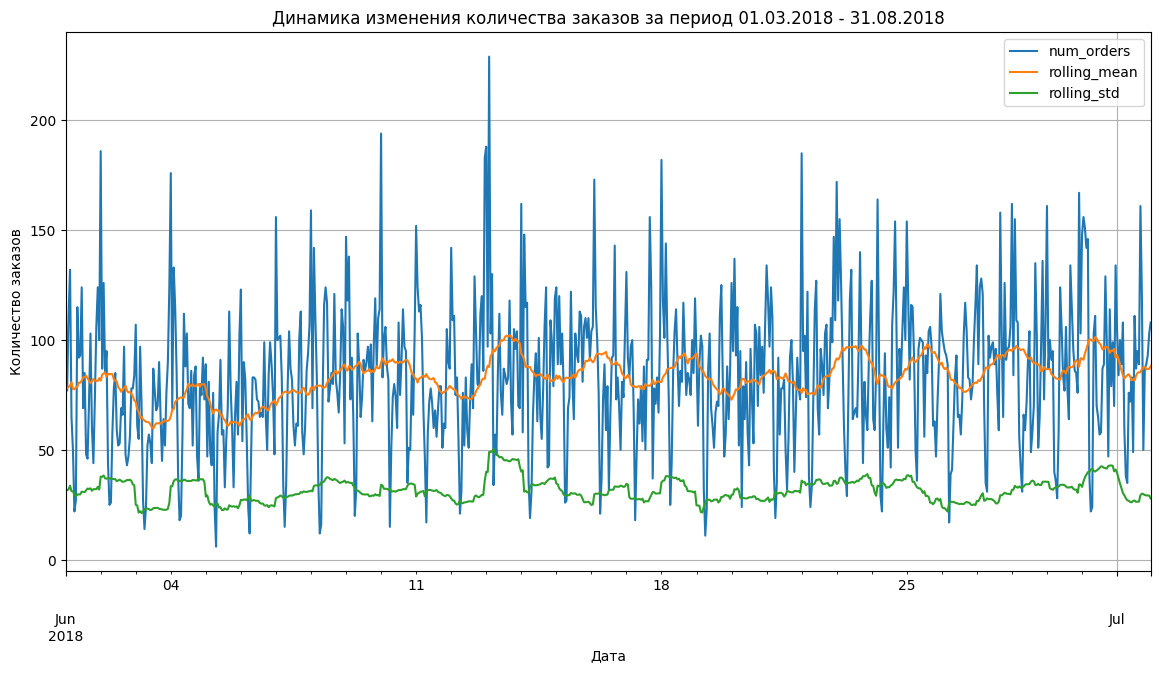

In [21]:
taxi_analyze['rolling_std'] = taxi_analyze['num_orders'].rolling(24).std()
taxi_analyze['2018-06-01':'2018-07-01'].plot(
    grid=True, 
    figsize=(14,7),
    title = 'Динамика изменения количества заказов за период 01.03.2018 - 31.08.2018',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

**Вывод**

Стандартное отклонение изменяется незначительно, поэтому можно говорить о стационарности ряда, это поможет при прогнозировании.

### Вывод

По результатам анализа данных временного ряда можно сделать следущие выводы:
- Количество заказов колеблется от 0 до 462 в час;
- Наблюдаются повторяющиеся события изменения динамики количества заказов как на уровне месяца, так и на уровне дня;
- Наблюдается тренд на увеличение количества заказов. Причем на протяжении всего периода наблюдается увеличение среднего, а в августе увеличение с ускорением.
- Можно заметить, дневную сезонность. Она заключается в следующем:
    - Минимум заказов приходится на 06:00;
    - Максимум заказов приходится на 00:00;
    - Также присутсвтует еще несколько меньших пиков: 09:00-10:00, 16:00-17:00, 22:00-23:00.
- На графике остатков можно заметить, что их количество увеличивается в августе, вероятно, это ухудшит метрики модели при предсказании модели;
- На недельном графике заметен постпенный рост в течение полугода, а затем снижение в середине августа к сентябрю;
- Стандартное отклонение изменяется незначительно, поэтому можно говорить о стационарности ряда, это поможет при прогнозировании.

## Обучение

### Создание признаков

Перед прогнозированием необходимо создать доплнительные признаки:
- Календарные (для указания тренда и сезонности);
- Отстающие (для указания роста или уменьшения функции);
- Скользящее среднее (для указания тренда функции).


In [22]:
def make_features(data, max_lag, rolling_mean_size):
    data_f = data.copy()
    data_f['day'] = data_f.index.day
    data_f['dayofweek'] = data_f.index.dayofweek
    data_f['hour'] = data_f.index.hour
    
    for lag in range(1, max_lag + 1):
        data_f['lag_{}'.format(lag)] = data_f['num_orders'].shift(lag)

    data_f['rolling_mean'] = data_f['num_orders'].shift().rolling(rolling_mean_size).mean()
    
    return data_f

### Подготовка данных

Для возможности экспериментов с созданием признаков, сделаем подготовку данных и обучение моделей в виде функций.

In [23]:
def prepare_features(data):
    train, test = train_test_split(data, shuffle=False, test_size=0.1)
    train = train.dropna()

    X_train = train.drop(columns='num_orders')
    y_train = train['num_orders']
    X_test = test.drop(columns='num_orders')
    y_test = test['num_orders']
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, y_train, X_test, y_test

### Модель линейной регрессии

In [24]:
def linear_regression(data, max_lag, rolling_mean_size):
    data = make_features(data, max_lag, rolling_mean_size)
    X_train, y_train, X_test, y_test = prepare_features(data)
    
    model_lr = LinearRegression()
    tscv = TimeSeriesSplit()
    rmse_lr = cross_val_score(
        model_lr,
        X_train,
        y_train,
        cv=tscv,
        scoring='neg_root_mean_squared_error').mean()
    rmse_lr = round(rmse_lr, 2)
    
    return rmse_lr

Поскольку наибольшая сезонность наблюдается на суточном диапазоне, max_lag примем 24, а с rolling_mean_size будем экспермиентировать.

In [25]:
rmse_lr_list = []
rolling_mean_size_list = [36, 48, 60, 72, 96, 120]

for rolling_mean_size in rolling_mean_size_list:
    rmse_lr_list.append(linear_regression(taxi, 24, rolling_mean_size))
    
pivot_lr = pd.DataFrame()
pivot_lr['rolling_mean_size_list'] = rolling_mean_size_list
pivot_lr['rmse_lr'] = rmse_lr_list

pivot_lr

,rolling_mean_size_list,rmse_lr
0,36,-27.22
1,48,-27.31
2,60,-27.32
3,72,-27.10
4,96,-27.14
5,120,-27.06


**Вывод**

Наилучшим результатом модели линейной регрессии был `RMSE`, равный 27.06. Данный результат был получен при размере отставания 24 и окна скользящего среднего 120.

### Модель случайного леса

In [26]:
def rf_model(data, max_lag, rolling_mean_size):
    data = make_features(data, max_lag, rolling_mean_size)
    X_train, y_train, X_test, y_test = prepare_features(data)
    
    model_rf = RandomForestRegressor(random_state=RANDOM_STATE)
    params = {'n_estimators':[10, 20, 40, 80]}
    
    tscv = TimeSeriesSplit()
    
    rand_cv = RandomizedSearchCV(
        model_rf,
        params,
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        random_state=RANDOM_STATE)
    rand_cv.fit(X_train, y_train)
    
    best_params = rand_cv.best_params_
    best_score = round(rand_cv.best_score_, 2)
    
    return best_params, best_score

In [27]:
%%time
best_params, best_score = rf_model(taxi, 24, 48)

print(f'Лучшие гиперпараметры модели дерева решений: {best_params}')
print(f'Лучшая метрика модели дерева решений: {best_score}')

Лучшие гиперпараметры модели дерева решений: {'n_estimators': 80}
Лучшая метрика модели дерева решений: -25.39
CPU times: total: 7.39 s
Wall time: 25.9 s


In [28]:
%%time
rmse_rf_list = []
params_rf_list = []
rolling_mean_size_list = [36, 48, 60, 72, 96, 120]

for rolling_mean_size in rolling_mean_size_list:
    best_params, rmse_rf = rf_model(taxi, 24, rolling_mean_size)
    rmse_rf_list.append(rmse_rf)
    params_rf_list.append(best_params)
        
pivot_rf = pd.DataFrame()
pivot_rf['rolling_mean_size_list'] = rolling_mean_size_list
pivot_rf['rmse_rf_list'] = rmse_rf_list
pivot_rf['params_rf_list'] = params_rf_list

pivot_rf

CPU times: total: 44.7 s
Wall time: 2min 10s


,rolling_mean_size_list,rmse_rf_list,params_rf_list
0,36,-25.20,{'n_estimators': 80}
1,48,-25.39,{'n_estimators': 80}
2,60,-25.12,{'n_estimators': 80}
3,72,-25.04,{'n_estimators': 80}
4,96,-25.29,{'n_estimators': 80}
5,120,-25.13,{'n_estimators': 80}


**Вывод**

Наилучшей моделью случайного леса с `RMSE` 25.04 является модель с параметрами `{'n_estimators': 80}` и размером окна скользящего среднего 72.

### Модель градиентного бустинга

In [29]:
def boost_model(data, max_lag, rolling_mean_size):
    data = make_features(data, max_lag, rolling_mean_size)
    X_train, y_train, X_test, y_test = prepare_features(data)
    
    model_lgbm = LGBMRegressor(random_state=RANDOM_STATE)
    params = {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.5]}
    
    tscv = TimeSeriesSplit()

    rand_cv = RandomizedSearchCV(
        model_lgbm,
        params,
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        random_state=RANDOM_STATE
    )
    
    rand_cv.fit(X_train, y_train)
    
    best_params = rand_cv.best_params_
    best_score = round(rand_cv.best_score_, 2)

    return best_params, best_score

In [30]:
%%time
best_params, best_score = boost_model(taxi, 24, 48)

print(f'Лучшие гиперпараметры модели дерева решений: {best_params}')
print(f'Лучшая метрика модели дерева решений: {best_score}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4870
[LightGBM] [Info] Number of data points in the train set: 3926, number of used features: 28
[LightGBM] [Info] Start training from score 78.516811
Лучшие гиперпараметры модели дерева решений: {'n_estimators': 50, 'learning_rate': 0.1}
Лучшая метрика модели дерева решений: -25.03
CPU times: total: 531 ms
Wall time: 3.98 s


In [31]:
%%time

rmse_gb_list = []
params_gb_list = []
rolling_mean_size_list = [36, 48, 60, 72, 96, 120]

for rolling_mean_size in rolling_mean_size_list:
    best_params, rmse_gb = boost_model(taxi, 24, rolling_mean_size)
    rmse_gb_list.append(rmse_gb)
    params_gb_list.append(best_params)
        
pibot_gb = pd.DataFrame()
pibot_gb['rolling_mean_size_list'] = rolling_mean_size_list
pibot_gb['rmse_gb_list'] = rmse_gb_list
pibot_gb['params_gb_list'] = params_gb_list

pibot_gb

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4870
[LightGBM] [Info] Number of data points in the train set: 3938, number of used features: 28
[LightGBM] [Info] Start training from score 78.498984
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4870
[LightGBM] [Info] Number of data points in the train set: 3926, number of used features: 28
[LightGBM] [Info] Start training from score 78.516811
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4859
[LightGBM] [Info] Number of data points in the train set: 3914, number of used features: 28
[LightGBM] [Info] Start trai

,rolling_mean_size_list,rmse_gb_list,params_gb_list
0,36,-25.17,"{'n_estimators': 50, 'learning_rate': 0.1}"
1,48,-25.03,"{'n_estimators': 50, 'learning_rate': 0.1}"
2,60,-24.93,"{'n_estimators': 50, 'learning_rate': 0.1}"
3,72,-24.74,"{'n_estimators': 100, 'learning_rate': 0.1}"
4,96,-24.98,"{'n_estimators': 50, 'learning_rate': 0.1}"
5,120,-25.06,"{'n_estimators': 50, 'learning_rate': 0.1}"


**Вывод**

Наилучшей моделью градиентного бустинга с `RMSE` 24.74 является модель с параметрами {'n_estimators': 100, 'learning_rate': 0.1} и размером окна скользящего среднего 72.

### Вывод

В ходе обучения и настройки моделей машинного обучения можно сделать следующие выводы:
- Наилучшим результатом модели линейной регрессии был `RMSE`, равный 27.06. Данный результат был получен при размере отставания 24 и окна скользящего среднего 120.
- Наилучшей моделью случайного леса с `RMSE` 25.04 является модель с параметрами `{'n_estimators': 80}` и размером окна скользящего среднего 72.
- Наилучшей моделью градиентного бустинга с `RMSE` 24.74 является модель с параметрами `{'n_estimators': 100, 'learning_rate': 0.1}` и размером окна скользящего среднего 72.
- Для дальнейшей работы приянто решение использовать модель градиентного бустинга, так как она дает наилучшее значение метрики `RMSE` и работает быстрее случайного леса.

## Тестирование

Снова выделим данные для тестирования и построим модель градиентного бустинга с параметрами, полученными в прошлом разделе:
- `{'n_estimators': 100, 'learning_rate': 0.1}`;
- Размер окна скользящего среднего 72.

In [32]:
taxi_final = make_features(taxi, 24, 72)
features_cols = taxi_final.columns
X_train, y_train, X_test, y_test = prepare_features(taxi_final)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3902, 28)
(3902,)
(442, 28)
(442,)


In [33]:
%%time

final_model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=RANDOM_STATE)
final_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4847
[LightGBM] [Info] Number of data points in the train set: 3902, number of used features: 28
[LightGBM] [Info] Start training from score 78.669144
CPU times: total: 453 ms
Wall time: 255 ms


LGBMRegressor(random_state=42)

In [34]:
%%time

preds = final_model.predict(X_test)

print(f'RMSE финальной модели на тестовых данных равен {round(mean_squared_error(y_test, preds, squared=False), 2)}')

RMSE финальной модели на тестовых данных равен 42.25
CPU times: total: 0 ns
Wall time: 7 ms


In [35]:
final_table = pd.DataFrame(y_test)
final_table['predict'] = preds

final_table.head(10)

,num_orders,predict
datetime,,
2018-08-13 14:00:00,102,109.487105
2018-08-13 15:00:00,175,106.174253
2018-08-13 16:00:00,144,149.341625
2018-08-13 17:00:00,152,138.180918
2018-08-13 18:00:00,104,113.961262
2018-08-13 19:00:00,91,110.119890
2018-08-13 20:00:00,82,107.818588
2018-08-13 21:00:00,160,110.677914
2018-08-13 22:00:00,104,142.595411


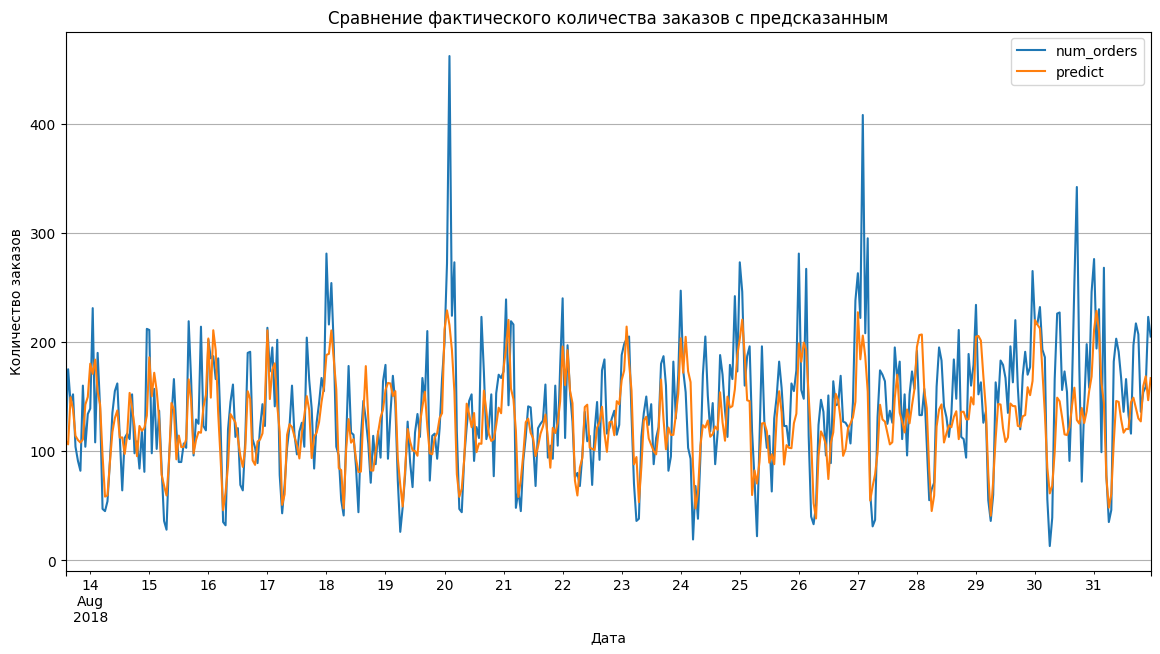

In [36]:
final_table.plot(
    grid=True, 
    figsize=(14,7),
    title = 'Сравнение фактического количества заказов с предсказанным',
    xlabel = 'Дата',
    ylabel = 'Количество заказов');

По графику сравнения предсказанного значения и реального можно заметить, что предсказания происходят достаточно точно, хоть и имеются некоторые отклонения.

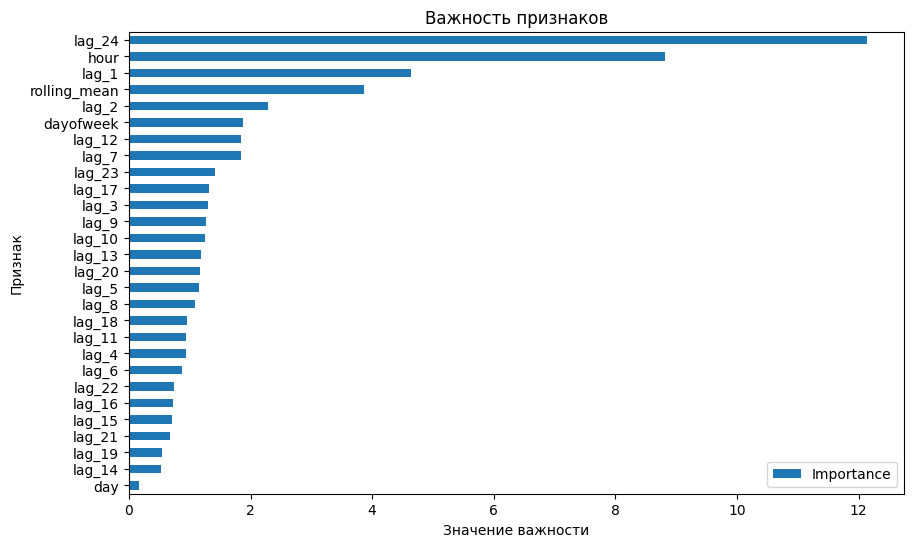

In [37]:
permutation = permutation_importance(final_model, X_train, y_train, scoring = 'neg_root_mean_squared_error')

feature_importance = pd.DataFrame({'Feature': features_cols[1:], 'Importance': permutation['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
plot = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plot.set(
    title='Важность признаков',
    xlabel='Значение важности',
    ylabel='Признак')
plt.show()

### Вывод

В ходе тестирования лучшей модели были получены следующие результаты:
- Лучшей моделью была выбрана модель градиентного бустинга с параметрами:
    - `{'n_estimators': 100, 'learning_rate': 0.1}`;
- Размер окна скользящего среднего 72;
- Отстающих признаков создано 24 в соответствии с количеством часов;
- Время обучения модели составляет 189 мс;
- Время предсказания модели составялет 7 мс;
- `RMSE` на тестовых данных составило 42.22, такую значительную разницу можно объяснить большим количеством шума в данных за август;
- Важность признаков показывает, что наиболее важными признаками являются задержка на 24 часа, час события и 1 час.

## Итоговый вывод

В ходе проведенного исследования был проделан следующий ряд работ и сделаны следующие выводы:


1. Открыт и изучен файл
    - В исходном датасете 26496 строк и один столбец;
    - В датасете после ресэмлирвоания по часу осталось 4416 строк и один столбец;
    - Данные о количестве заказов собраны с 1 марта 2018 года по 31 августа 2018 года;
    - Данные пригодны для дальнейшего исследования.
    - Данные были признаны пригодными для исследования.
         
        
2. Проведен анализ данных :
    - Количество заказов колеблется от 0 до 462 в час;
    - Наблюдаются повторяющиеся события изменения динамики количества заказов как на уровне месяца, так и на уровне дня;
    - Наблюдается тренд на увеличение количества заказов;
    - Можно заметить, дневную сезонность. Она заключается в следующем:
        - Минимум заказов приходится на 06:00;
        - Максимум заказов приходится на 00:00;
        - Также присутсвтует еще несколько меньших пиков: 09:00-10:00, 16:00-17:00, 22:00-23:00.
    - Стандартное отклонение изменяется незначительно, поэтому можно говорить о стационарности ряда, это поможет при прогнозировании.

    
3. Построены модели машинного обучения:
    - Наилучшим результатом модели линейной регрессии был `RMSE`, равный 27.06. Данный результат был получен при размере отставания 24 и окна скользящего среднего 120.
    - Наилучшей моделью случайного леса с `RMSE` 25.04 является модель с параметрами `{'n_estimators': 80}` и размером окна скользящего среднего 72.
    - Наилучшей моделью градиентного бустинга с `RMSE` 24.74 является модель с параметрами `{'n_estimators': 100, 'learning_rate': 0.1}` и размером окна скользящего среднего 72.
    - Для дальнейшей работы приянто решение использовать модель градиентного бустинга, так как она дает наилучшее значение метрики `RMSE` и работает быстрее случайного леса.
    
    
4. Проведено тестирование лучшей модели машинного обучения:
    - `{'n_estimators': 100, 'learning_rate': 0.1}`;
    - Размер окна скользящего среднего 72;
    - Отстающих признаков создано 24 в соответствии с количеством часов;
    - Время обучения модели составляет 189 мс;
    - Время предсказания модели составялет 7 мс;
    - `RMSE` на тестовых данных составило 42.22, такую значительную разницу можно объяснить большим количеством шума в данных за август;
    - Важность признаков показывает, что наиболее важными признаками являются задержка на 24 часа, час события и 1 час.
    

5. Итоговый вывод:
    - Разработанные модели машинного обучения показали хорошие результаты для предсказания данных, но в качестве финальной была выбрана модель градиентного бустинга, так как она обеспечивает хорошее качество предсказания и низкое время выполнения.
    - RMSE разработанной модели составляет 42, в то время как по условию необходимо 48.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48